In [1]:
!pip install category_encoders


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
import pandas as pd # Import pandas

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("churn.csv")

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
sns.set_style(style='whitegrid')

In [ ]:
plt.figure(figsize=(12,5))


In [ ]:
sns.countplot(x='Exited', data=df)
plt.title("Distribution of Churn")

In [ ]:
sns.histplot(x='Age', data=df, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
#

In [ ]:
sns.scatterplot(x='CreditScore', y='Age', data=df, hue="Exited")
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.title("CreditScore vs Age")
#

In [ ]:
sns.boxplot(x='Exited', y ='Balance', data = df)
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.title("Balance Distribution by Churn")
#

In [ ]:
sns.boxplot(x='Exited', y ='CreditScore', data = df)
plt.xlabel("Exited")
plt.ylabel("Credit Score")
plt.title("Credit Score Distribution by Churn")
#

In [ ]:
features = df.drop('Exited', axis=1)#everything except exited column

In [ ]:
features

In [ ]:
target = df['Exited']

In [ ]:
target #1 means churned, 0 means it didnt churn

## The Ideal Training Dataset Split for Machine Learning Projects

When embarking on a machine learning project, selecting and partitioning your dataset is crucial for building a robust and accurate model. While flexibility exists for tailoring the split to specific needs, research indicates that a particular division often yields the most efficient outcomes.


This widely recommended approach involves dividing the dataset into three distinct subsets:


* **Training Set:** This portion comprises the majority of your data (typically around 70-80%) and serves as the primary learning material for your machine learning model. The model iteratively adjusts its parameters using this data to identify patterns and relationships.

* **Validation Set:**  Accounting for about 10-15% of the data, the validation set acts as an independent measure of the model's performance during training. It aids in tuning the model's hyperparameters and preventing overfitting to the training set.

* **Test Set:** This final subset, representing the remaining 10-15% of the data, is reserved for evaluating the model's final performance and generalization ability on unseen data. It simulates how the model would perform in real-world scenarios.


While variations may exist depending on the specific dataset and project, adopting this balanced split generally provides a sound foundation for developing effective machine learning models. It ensures the model is adequately trained, avoids overfitting, and delivers reliable performance on new data.

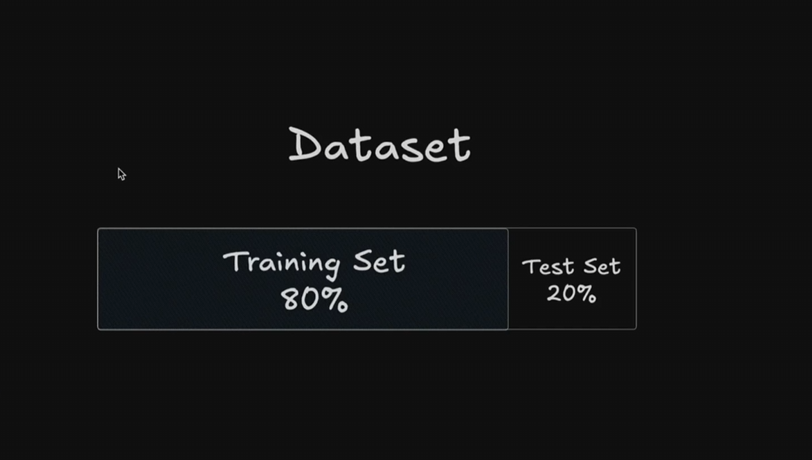

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
target = df["Exited"]
features = pd.get_dummies(features, columns=["Geography", "Gender"])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

In [ ]:
X_train


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr_model =LogisticRegression(random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_predictions

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

In [ ]:
def evalute_and_save_model(model, X_train, X_test, y_train, y_test, file_name):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}%")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
  print(f"\n{'-' * 50}\n")

  with open(file_name, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved as {file_name}")

In [ ]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library and alias it as 'xgb'

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evalute_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evalute_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evalute_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evalute_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evalute_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evalute_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

In [ ]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

In [ ]:
feature_importance

In [ ]:
feature_names

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [ ]:
feature_importance_df

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
features

In [ ]:
features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

In [ ]:
features

In [ ]:
features['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', "MiddleAge", "Senior", "Elderly"])

In [ ]:
features

In [ ]:
features['TenureAgeRatio'] = df['Tenure'] / df['Age']

In [ ]:
features

In [ ]:
features = pd.get_dummies(features, drop_first=True)

In [ ]:
features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evalute_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureEngineered.pkl")

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
evalute_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost-featureEngineered-smote.pkl")

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state=42)), ('random_forest', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state =42, probability = True))],
    voting='soft'
)

In [ ]:
evalute_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")